In [1]:
from barcode import EAN13

In [2]:
import qrcode
from PIL import Image

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Supported Formats  this package supports the following formats:

EAN-8
EAN-13
EAN-14
UPC-A
JAN
ISBN-10
ISBN-13
ISSN
Code 39
Code 128
PZN
GS1-128

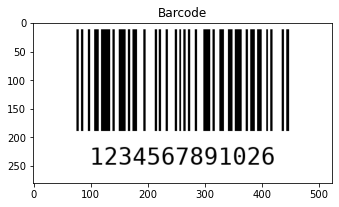

In [17]:
from barcode import EAN13
from barcode.writer import ImageWriter

with open('barcode.png', 'wb') as f:
    EAN13('123456789102', writer=ImageWriter()).write(f)

barcode = cv2.imread("barcode.png")
imshow("Barcode", barcode)

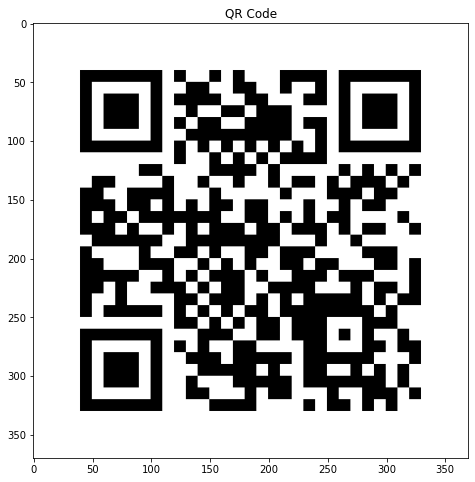

In [4]:
import qrcode
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

qr.add_data("https://wwww.opencv.org")
qr.make(fit=True)
img = qr.make_image(fill_color="black", back_color="white")
img.save("qrcode.png")

qrcode = cv2.imread("qrcode.png")
imshow("QR Code", qrcode, size = 8)

In [5]:
from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open('qrcode.png')
result = decode(img)
for i in result:
    print(i.data.decode("utf-8"))

https://wwww.opencv.org


[Point(x=171, y=475), Point(x=188, y=737), Point(x=445, y=743), Point(x=455, y=482)]
QR Code revealed: upi://pay?pa=paytmqr28100505010133uogk2cift6@paytm&pn=Paytm%20Merchant&mc=5499&mode=02&orgid=000000&paytmqr=28100505010133UOGK2CIFT6 (QRCODE)


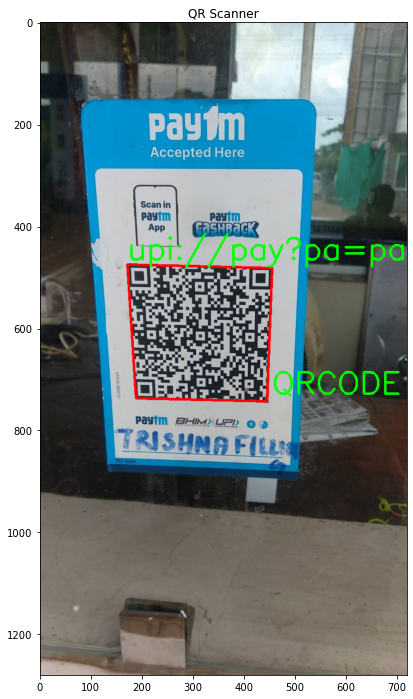

In [9]:
from pyzbar.pyzbar import decode

image = cv2.imread("C:/Users/rajen/Computer Vision/images/images/WhatsApp Image 2022-07-26 at 10.09.54 AM.jpeg")

# Detect and decode the qrcode
codes = decode(image)

# loop over the detected barcodes
for bc in codes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  print(bc.polygon)
  pt1,pt2,pt3,pt4 = bc.polygon

  # Draw a bounding box over our detected QR code
  pts = np.array( [[pt1.x,pt1.y], [pt2.x,pt2.y], [pt3.x,pt3.y], [pt4.x,pt4.y]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(image, [pts], True, (0,0,255), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  # show our 
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("QR Code revealed: {}".format(text))

# display our output
imshow("QR Scanner", image, size = 12)

Barcode revealed: 9780863815805
Barcode revealed: 9780863815805


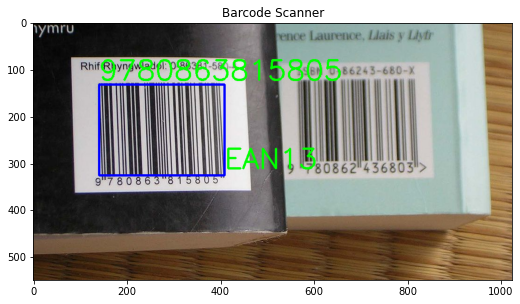

In [16]:
from pyzbar.pyzbar import decode

image = cv2.imread("C:/Users/rajen/Computer Vision/images/images/1024px-ISBN.jpg")

# Detect and decode the qrcode
barcodes = decode(image)

# loop over the detected barcodes
for bc in barcodes:
  # Get the rect coordiantes for our text placement
  (x, y, w, h) = bc.rect
  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)

  # extract the string info data and the type from our object
  barcode_text = bc.data.decode()
  barcode_type = bc.type

  # show our 
  text = "{} ({})".format(barcode_text, barcode_type)
  cv2.putText(image, barcode_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  cv2.putText(image, barcode_type, (x+w, y+h - 15), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  print("Barcode revealed: {}".format(barcode_text))
  print("Barcode revealed: {}".format(barcode_text))

# display our output
imshow("Barcode Scanner", image, size = 16)